In [76]:
import seaborn as sns
import keras
from nltk.tokenize import word_tokenize
from nltk.text import Text
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer
import nltk

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\paulh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\paulh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\paulh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\paulh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [77]:
# Importing the dataset
df = pd.read_csv('train.csv')
df = df.drop(['id'], axis=1)
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [78]:
#creating the database
df['comment_text'] = df['comment_text'].str.lower()
df['comment_text'] = df['comment_text'].str.replace('[^\w\s]',' ')
df['comment_text'] = df['comment_text'].str.replace('\d+', '')
df['comment_text'] = df['comment_text'].str.replace('\n', ' ')
df['comment_text'] = df['comment_text'].str.replace('\t', ' ')
df['comment_text'] = df['comment_text'].str.replace('\r', ' ')

df['comment_text'] = df['comment_text'].str.replace('http\S+|www.\S+', '', case=False)

df['comment_text'] = df['comment_text'].str.replace(' +', ' ')
df['comment_text'] = df['comment_text'].str.strip()
df.head()

C:\Users\paulh\AppData\Local\Temp\ipykernel_16660\3786741218.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['comment_text'] = df['comment_text'].str.replace('[^\w\s]',' ')
C:\Users\paulh\AppData\Local\Temp\ipykernel_16660\3786741218.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['comment_text'] = df['comment_text'].str.replace('\d+', '')
C:\Users\paulh\AppData\Local\Temp\ipykernel_16660\3786741218.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['comment_text'] = df['comment_text'].str.replace('http\S+|www.\S+', '', case=False)
C:\Users\paulh\AppData\Local\Temp\ipykernel_16660\3786741218.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df['comment_text'] = df['comment_text'].str.replace(' +', ' ')


,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,explanation why the edits made under my userna...,0,0,0,0,0,0
1,d aww he matches this background colour i m se...,0,0,0,0,0,0
2,hey man i m really not trying to edit war it s...,0,0,0,0,0,0
3,more i can t make any real suggestions on impr...,0,0,0,0,0,0
4,you sir are my hero any chance you remember wh...,0,0,0,0,0,0


In [79]:
#Tokenization
tokenizer = nltk.RegexpTokenizer(r'\w+')
tokens = df['comment_text'].apply(tokenizer.tokenize)
tokens.head()

0    [explanation, why, the, edits, made, under, my...
1    [d, aww, he, matches, this, background, colour...
2    [hey, man, i, m, really, not, trying, to, edit...
3    [more, i, can, t, make, any, real, suggestions...
4    [you, sir, are, my, hero, any, chance, you, re...
Name: comment_text, dtype: object

In [80]:
#removing the stopwords
from nltk.corpus import stopwords

stop = stopwords.words('english')
tokens = tokens.apply(lambda x: [item for item in x if item not in stop])
tokens.head()

0    [explanation, edits, made, username, hardcore,...
1    [aww, matches, background, colour, seemingly, ...
2    [hey, man, really, trying, edit, war, guy, con...
3    [make, real, suggestions, improvement, wondere...
4                  [sir, hero, chance, remember, page]
Name: comment_text, dtype: object

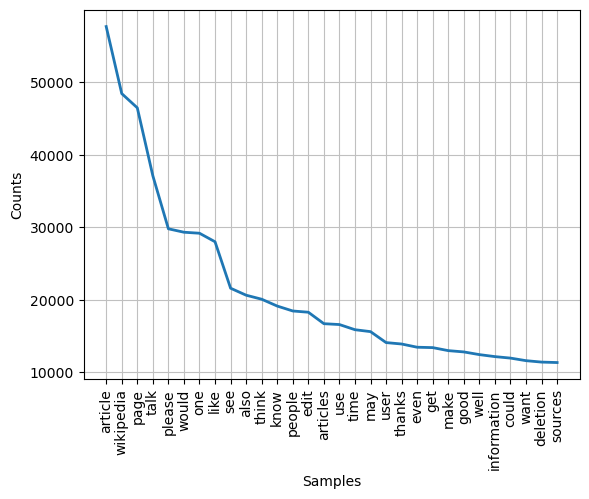

In [81]:
#Visualisation graphique des mots les plus fréquents dans le dataset classés par ordre décroissant
from nltk.probability import FreqDist

fdist = FreqDist()
for i in range(len(tokens)):
    for word in tokens[i]:
        fdist[word] += 1
fdist.most_common(10)

fdist.plot(30,cumulative=False)
plt.show()

In [82]:
#Lemmatization
lemmatizer = WordNetLemmatizer()
tokens = tokens.apply(lambda x: [lemmatizer.lemmatize(y) for y in x])
tokens.head()

0    [explanation, edits, made, username, hardcore,...
1    [aww, match, background, colour, seemingly, st...
2    [hey, man, really, trying, edit, war, guy, con...
3    [make, real, suggestion, improvement, wondered...
4                  [sir, hero, chance, remember, page]
Name: comment_text, dtype: object

In [83]:
#Stemming
stemmer = LancasterStemmer()
tokens = tokens.apply(lambda x: [stemmer.stem(y) for y in x])
tokens.head()

0    [expl, edit, mad, usernam, hardc, metallic, fa...
1    [aww, match, background, colo, seem, stuck, th...
2    [hey, man, real, try, edit, war, guy, const, r...
3    [mak, real, suggest, improv, wond, sect, stat,...
4                      [sir, hero, chant, rememb, pag]
Name: comment_text, dtype: object

In [84]:
#replace the tokens in the dataframe
df['comment_text'] = tokens.apply(lambda x: ' '.join(x))
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,expl edit mad usernam hardc metallic fan rever...,0,0,0,0,0,0
1,aww match background colo seem stuck thank tal...,0,0,0,0,0,0
2,hey man real try edit war guy const remov rele...,0,0,0,0,0,0
3,mak real suggest improv wond sect stat lat sub...,0,0,0,0,0,0
4,sir hero chant rememb pag,0,0,0,0,0,0


In [85]:
#splitting the data
from sklearn.model_selection import train_test_split

X = df['comment_text']
y = df.drop(['comment_text'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((127656,), (31915,), (127656, 6), (31915, 6))

In [86]:
#tokenizing the data
from keras.preprocessing.text import Tokenizer
import tensorflow as tf

maxlen = 100
training_samples = 20000
validation_samples = 5000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = tf.keras.utils.pad_sequences(sequences, maxlen=maxlen)

Found 103168 unique tokens.


In [87]:
#building the model
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(6, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 8)            80000     
                                                                 
 flatten_4 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 6)                 4806      
                                                                 
Total params: 84,806
Trainable params: 84,806
Non-trainable params: 0
_________________________________________________________________


In [88]:
#training the model
history = model.fit(data, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
3192/3192 [==============================] - 12s 4ms/step - loss: 0.0908 - acc: 0.9307 - val_loss: 0.0685 - val_acc: 0.7708
Epoch 2/5
3192/3192 [==============================] - 12s 4ms/step - loss: 0.0611 - acc: 0.8191 - val_loss: 0.0659 - val_acc: 0.8063
Epoch 3/5
3192/3192 [==============================] - 11s 4ms/step - loss: 0.0560 - acc: 0.7373 - val_loss: 0.0657 - val_acc: 0.4902
Epoch 4/5
3192/3192 [==============================] - 14s 4ms/step - loss: 0.0525 - acc: 0.6718 - val_loss: 0.0658 - val_acc: 0.6388
Epoch 5/5
3192/3192 [==============================] - 12s 4ms/step - loss: 0.0496 - acc: 0.5947 - val_loss: 0.0667 - val_acc: 0.5824


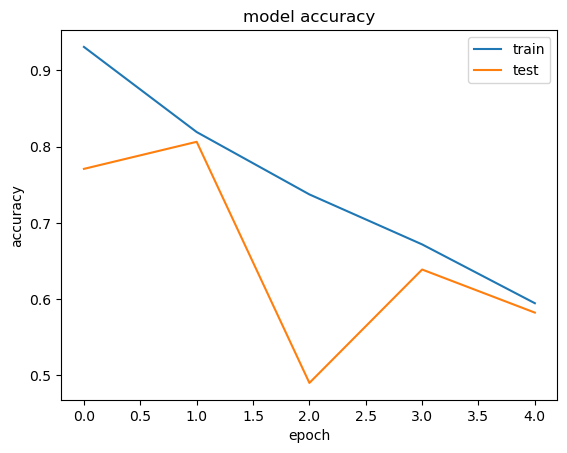

In [89]:
#plotting the accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

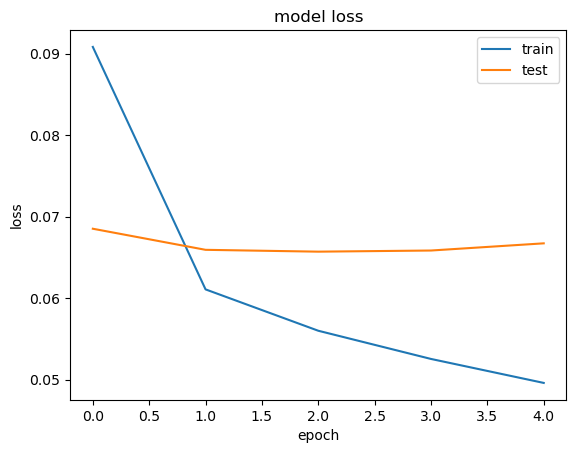

In [90]:
#plotting the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [92]:
#evaluating the model
model.evaluate(data, y_train)

3990/3990 [==============================] - 12s 3ms/step - loss: 0.0494 - acc: 0.5774


[0.049365684390068054, 0.5773720145225525]

In [93]:
#predicting the test data
test_sequences = tokenizer.texts_to_sequences(X_test)
test_data = tf.keras.utils.pad_sequences(test_sequences, maxlen=maxlen)
test_pred = model.predict(test_data)

998/998 [==============================] - 2s 2ms/step
